<a href="https://colab.research.google.com/github/AN-06/Air-Aware/blob/main/AirAware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1 - Data Collection and Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mexwell/world-air-quality -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/mexwell/world-air-quality
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.63M [00:00<?, ?B/s]
100% 1.63M/1.63M [00:00<00:00, 533MB/s]


In [ ]:
!head -n 20 /content/openaq.csv

﻿Country Code;City;Location;Coordinates;Pollutant;Source Name;Unit;Value;Last Updated;Country Label
BE;;Escautpont;50.420270857658636, 3.551812869268811;SO2;EEA France;µg/m³;3.6;2017-07-18T22:00:00+02:00;Belgium
BG;Teleorman-RNMCA;NET-RO058A;43.650721999999995, 25.363583;CO;EEA Romania;µg/m³;1237.2511399999999;2024-03-11T09:00:00+01:00;Bulgaria
BG;National air network;NET-BG001A;42.518891999999994, 27.375144;O3;EEA Bulgaria;µg/m³;12.06;2024-03-11T08:00:00+01:00;Bulgaria
BG;National air network;NET-BG001A;42.669796999999996, 23.268403000000003;NO;EEA Bulgaria;µg/m³;42.43;2024-03-11T08:00:00+01:00;Bulgaria
BG;National air network;NET-BG001A;43.217279999999995, 27.935959999999998;NO2;EEA Bulgaria;µg/m³;16.6;2024-03-11T08:00:00+01:00;Bulgaria
BR;Rio de Janeiro;São Cristóvão;-22.8961, -43.2212;O3;rio-city-hall;µg/m³;0.0;2023-11-30T15:00:00+01:00;Brazil
BR;Americana;Americana;-22.7242527, -47.33954929;PM10;Sao Paulo CETESB;µg/m³;49.0;2023-04-05T17:00:00+02:00;Brazil
BR;São Paulo;Congonhas;-2

In [ ]:

df = pd.read_csv('/content/openaq.csv', sep=';')

#Look for dataset
print(df.shape)
df.head()



(54551, 10)


,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,BE,NaN,Escautpont,"50.420270857658636, 3.551812869268811",SO2,EEA France,µg/m³,3.60000,2017-07-18T22:00:00+02:00,Belgium
1,BG,Teleorman-RNMCA,NET-RO058A,"43.650721999999995, 25.363583",CO,EEA Romania,µg/m³,1237.25114,2024-03-11T09:00:00+01:00,Bulgaria
2,BG,National air network,NET-BG001A,"42.518891999999994, 27.375144",O3,EEA Bulgaria,µg/m³,12.06000,2024-03-11T08:00:00+01:00,Bulgaria
3,BG,National air network,NET-BG001A,"42.669796999999996, 23.268403000000003",NO,EEA Bulgaria,µg/m³,42.43000,2024-03-11T08:00:00+01:00,Bulgaria
4,BG,National air network,NET-BG001A,"43.217279999999995, 27.935959999999998",NO2,EEA Bulgaria,µg/m³,16.60000,2024-03-11T08:00:00+01:00,Bulgaria


In [ ]:

df = pd.read_csv('/content/openaq.csv', sep=';')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce', utc=True)


df = df[['Last Updated','Country Code','City','Location','Pollutant','Value']].copy()

print("Loaded rows:", len(df))
df.head()


Loaded rows: 54551


,Last Updated,Country Code,City,Location,Pollutant,Value
0,2017-07-18 20:00:00+00:00,BE,NaN,Escautpont,SO2,3.60000
1,2024-03-11 08:00:00+00:00,BG,Teleorman-RNMCA,NET-RO058A,CO,1237.25114
2,2024-03-11 07:00:00+00:00,BG,National air network,NET-BG001A,O3,12.06000
3,2024-03-11 07:00:00+00:00,BG,National air network,NET-BG001A,NO,42.43000
4,2024-03-11 07:00:00+00:00,BG,National air network,NET-BG001A,NO2,16.60000


In [ ]:

df_wide = df.pivot_table(
    index=['Last Updated','Country Code','City','Location'],
    columns='Pollutant',
    values='Value',
    aggfunc='mean'
).reset_index()


df_wide.columns.name = None

print("Wide shape:", df_wide.shape)
display(df_wide.head())


Wide shape: (10292, 14)


,Last Updated,Country Code,City,Location,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2
0,2014-03-13 12:00:00+00:00,US,Atlanta,SPARTAN - Emory University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,2014-08-12 20:00:00+00:00,US,Mammoth Cave NP,SPARTAN - Mammoth Cave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN
2,2015-08-21 01:00:00+00:00,VN,Hanoi,SPARTAN - Vietnam Acad. Sci.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.9,NaN
3,2015-09-25 00:00:00+00:00,SG,Singapore,SPARTAN - NUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.9,NaN
4,2016-02-09 20:00:00+00:00,GB,London,Haringey Roadside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN


In [ ]:

df_wide = df_wide.rename(columns={'Last Updated':'datetime'})


df_wide['datetime'] = pd.to_datetime(df_wide['datetime'], utc=True, errors='coerce')
df_wide = df_wide.sort_values('datetime').reset_index(drop=True)


print("Columns now:", df_wide.columns.tolist()[:20])


Columns now: ['datetime', 'Country Code', 'City', 'Location', 'BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2']


In [ ]:

freq = 'D'


numeric_cols = df_wide.select_dtypes(include=[np.number]).columns.tolist()
print("Detected numeric pollutant columns:", numeric_cols)


dfs = []
for loc, g in df_wide.groupby('Location'):
    g = g.set_index('datetime').sort_index()

    g_num = g[numeric_cols].resample(freq).mean()
    g_num = g_num.reset_index()
    g_num['Location'] = loc

    if 'City' in g.columns:
        city_val = g['City'].ffill().bfill().iloc[0] if g['City'].notna().any() else None
        g_num['City'] = city_val
    if 'Country Code' in g.columns:
        cc_val = g['Country Code'].ffill().bfill().iloc[0] if g['Country Code'].notna().any() else None
        g_num['Country Code'] = cc_val
    dfs.append(g_num)

df_resampled = pd.concat(dfs, ignore_index=True)
print("Resampled shape:", df_resampled.shape)
display(df_resampled.head())


Detected numeric pollutant columns: ['BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2']
Resampled shape: (1123862, 14)


,datetime,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2,Location,City,Country Code
0,2020-03-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,NaN,1001,CA8 - ARB,US
1,2020-03-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US
2,2020-03-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US
3,2020-03-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US
4,2020-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US


In [ ]:

#handled missing values
df_resampled['datetime'] = pd.to_datetime(df_resampled['datetime'], utc=True, errors='coerce')


numeric_cols = [c for c in df_resampled.columns if c not in ['datetime','Location','City','Country Code']]
print("Numeric cols:", numeric_cols)

parts = []
for loc, g in df_resampled.groupby('Location', sort=False):
    g = g.sort_values('datetime').set_index('datetime')

    if len(g) > 0:
        g_num = g[numeric_cols].interpolate(method='time', limit=7)
        g_num = g_num.ffill().bfill()
        meta = g.drop(columns=numeric_cols, errors='ignore')

        g_out = pd.concat([g_num, meta], axis=1).reset_index()
    else:

        g_out = g.reset_index()
    parts.append(g_out)

df_resampled = pd.concat(parts, ignore_index=True, sort=False)

numeric_present = [c for c in numeric_cols if c in df_resampled.columns]
print("After interpolation — missing counts:")
print(df_resampled[numeric_present].isna().sum())


df_resampled.head()


Numeric cols: ['BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2']
After interpolation — missing counts:
BC       1082065
CO        630103
NO        890017
NO2       381546
NOX      1013769
O3        267267
PM1      1123831
PM10      409273
PM2.5     320832
SO2       505706
dtype: int64


,datetime,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2,Location,City,Country Code
0,2020-03-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.30,NaN,1001,CA8 - ARB,US
1,2020-03-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.42,NaN,1001,CA8 - ARB,US
2,2020-03-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.54,NaN,1001,CA8 - ARB,US
3,2020-03-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.66,NaN,1001,CA8 - ARB,US
4,2020-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.78,NaN,1001,CA8 - ARB,US


In [ ]:
def iqr_clip(s, k=1.5):
    if s.dropna().shape[0] < 4:
        return s
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    return s.clip(q1 - k*(q3-q1), q3 + k*(q3-q1))

for col in numeric_cols:
    df_resampled[col] = df_resampled.groupby('Location')[col].transform(lambda s: iqr_clip(s))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_resampled[numeric_cols] = scaler.fit_transform(df_resampled[numeric_cols].fillna(0))

print("Clipping + normalization done.")


Clipping + normalization done.


In [ ]:
df_resampled['dayofweek'] = pd.to_datetime(df_resampled['datetime'], utc=True).dt.dayofweek
df_resampled['month'] = pd.to_datetime(df_resampled['datetime'], utc=True).dt.month
df_resampled['season'] = ((df_resampled['month'] % 12 + 3)//3)

df_resampled.head()


,datetime,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2,Location,City,Country Code,dayofweek,month,season
0,2020-03-04 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.909572,0.247638,1001,CA8 - ARB,US,2,3,2
1,2020-03-05 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.909765,0.247638,1001,CA8 - ARB,US,3,3,2
2,2020-03-06 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.909958,0.247638,1001,CA8 - ARB,US,4,3,2
3,2020-03-07 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.910150,0.247638,1001,CA8 - ARB,US,5,3,2
4,2020-03-08 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.910343,0.247638,1001,CA8 - ARB,US,6,3,2


In [ ]:
out_path = '/content/openaq_preprocessed_daily.csv'
df_resampled.to_csv(out_path, index=False)
print("Saved preprocessed dataset to:", out_path)


Saved preprocessed dataset to: /content/openaq_preprocessed_daily.csv


Shape: (1123862, 17)
Columns: ['datetime', 'BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2', 'Location', 'City', 'Country Code', 'dayofweek', 'month', 'season']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123862 entries, 0 to 1123861
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   datetime      1123862 non-null  datetime64[ns, UTC]
 1   BC            1123862 non-null  float64            
 2   CO            1123862 non-null  float64            
 3   NO            1123862 non-null  float64            
 4   NO2           1123862 non-null  float64            
 5   NOX           1123862 non-null  float64            
 6   O3            1123862 non-null  float64            
 7   PM1           1123862 non-null  float64            
 8   PM10          1123862 non-null  float64            
 9   PM2.5         1123862 non-null  float64            
 10  SO2           1123

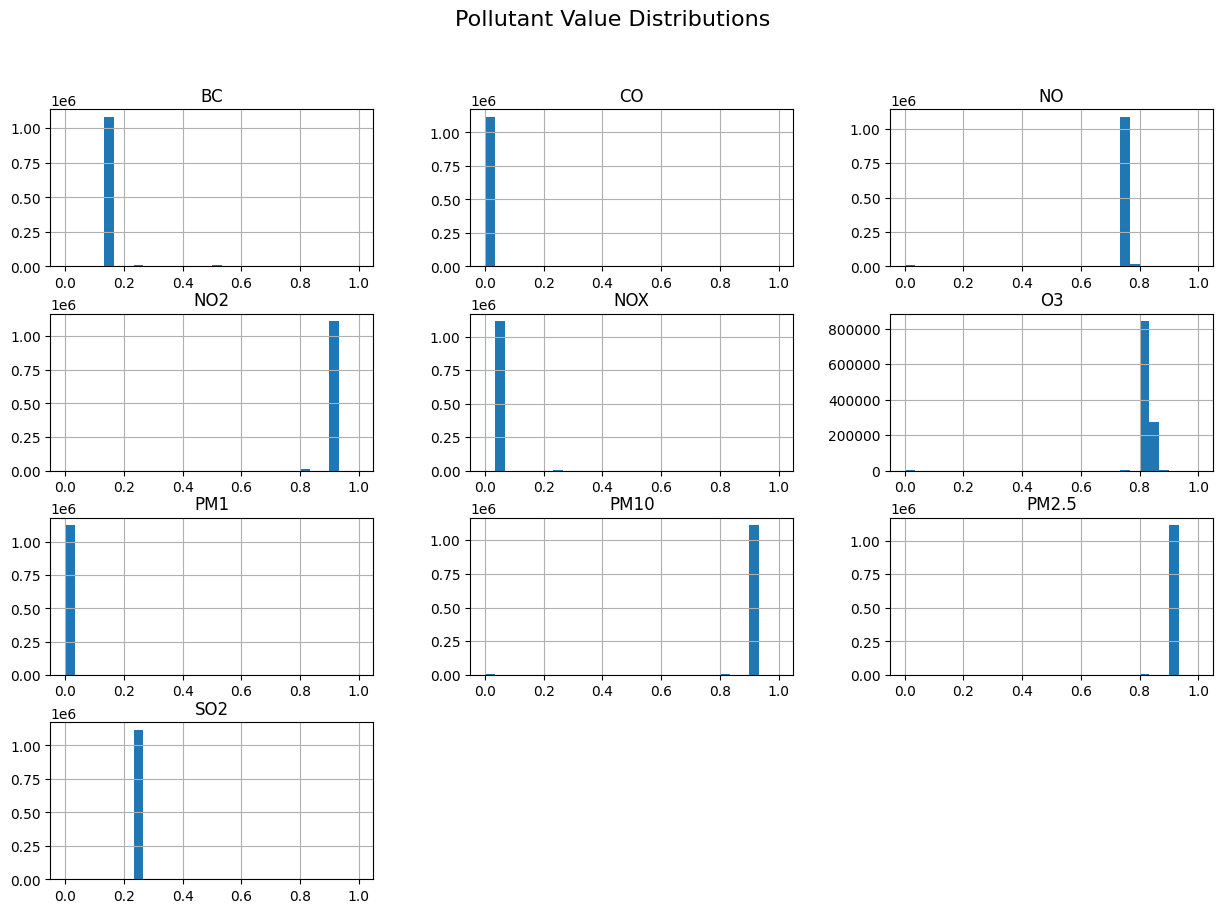

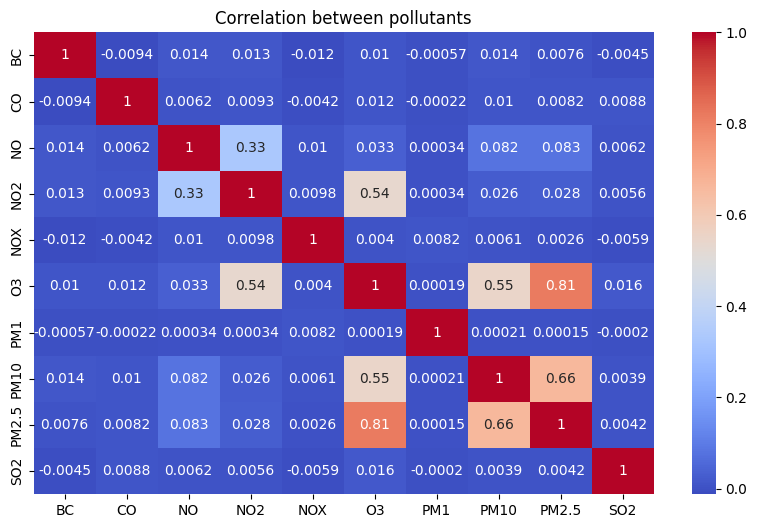

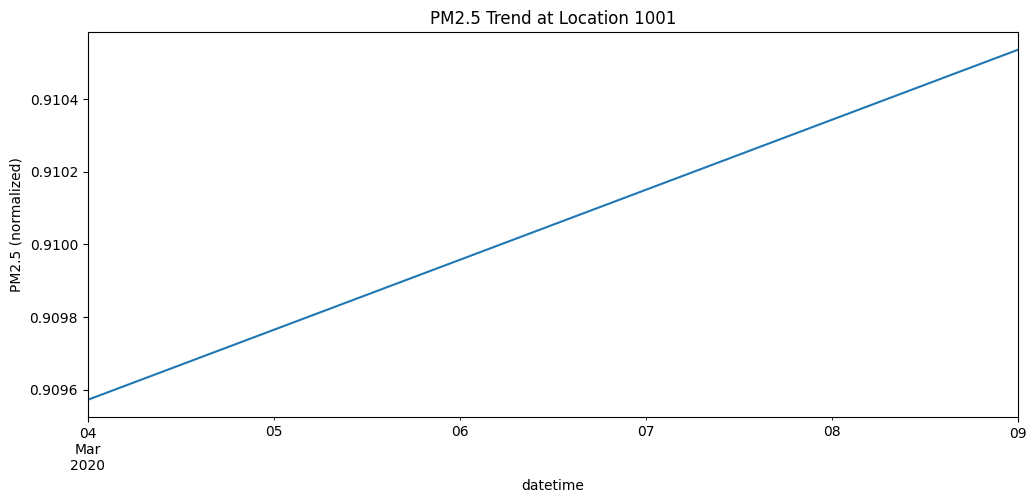

In [ ]:

# Reloading preprocessed dataset
df_resampled = pd.read_csv("/content/openaq_preprocessed_daily.csv")


df_resampled['datetime'] = pd.to_datetime(df_resampled['datetime'], errors='coerce', utc=True)

numeric_cols = [c for c in df_resampled.columns if c not in ['datetime','Location','City','Country Code','dayofweek','month','season']]

# --- Exploratory Data Analysis (EDA) ---

# 1. Dataset overview
print("Shape:", df_resampled.shape)
print("Columns:", df_resampled.columns.tolist())
print(df_resampled.info())
print(df_resampled.describe())

# 2. Missing values summary
missing = df_resampled.isna().sum()
print("\nMissing values per column:")
print(missing[missing > 0])

# 3. Pollutant distributions
df_resampled[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Pollutant Value Distributions", fontsize=16)
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_resampled[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between pollutants")
plt.show()

# 5. Time-series trend (example: PM2.5 at first location)
sample_loc = df_resampled['Location'].iloc[0]
df_resampled[df_resampled['Location']==sample_loc].set_index('datetime')['PM2.5'].plot(figsize=(12,5))
plt.title(f"PM2.5 Trend at Location {sample_loc}")
plt.ylabel("PM2.5 (normalized)")
plt.show()
